In [35]:
import pandas
pandas.set_option('display.max_rows',1000)
pandas.set_option('display.max_columns',10000)
import math
import matplotlib
import matplotlib.pyplot as plt 

In [36]:
def clean_dict_func(input_dict):
    return dict((k, v) for k, v in input_dict.items() if not (type(k) == float and math.isnan(k)))

def get_year_dict(int_year):
    file_name = 'music'+str(int_year)+'_chords.csv'
    df = pandas.read_csv(file_name)
    df = df.drop(df.columns[0], axis=1)
    index = 0
    temp_dict = dict()
    for index in range(0, len(df)):
        row = df.iloc[index]
        top1 = row['top_1']
        top2 = row['top_2']
        top3 = row['top_3']
        if top1 in temp_dict:
            temp_dict[top1] = temp_dict[top1] + (1000 - index*10)
        else:
            temp_dict[top1] = 1000 - index*10
        if top2 in temp_dict:
            temp_dict[top2] = temp_dict[top2] + (1000 - index*10) - 2
        else:
            temp_dict[top2] = 1000 - index*10 - 2
        if top3 in temp_dict:
            temp_dict[top3] = temp_dict[top3] + (1000 - index*10) - 3
        else:
            temp_dict[top3] = 1000 - index*10 - 3
    clean_dict = clean_dict_func(temp_dict)
    temp_df = pandas.DataFrame()
    temp_df = temp_df.from_dict(clean_dict, orient='index')
    temp_col_name = 'year_'+str(int_year)
    temp_df.columns = [temp_col_name]
    temp_df = temp_df.sort_values(temp_col_name, ascending=False)
    return temp_df

In [37]:
final_df = get_year_dict(2006)

In [38]:
for i in range(2007, 2017):
    final_df = final_df.join(get_year_dict(i))

In [39]:
final_df = final_df.fillna(0)

In [40]:
final_df['chord_pair'] = final_df.index

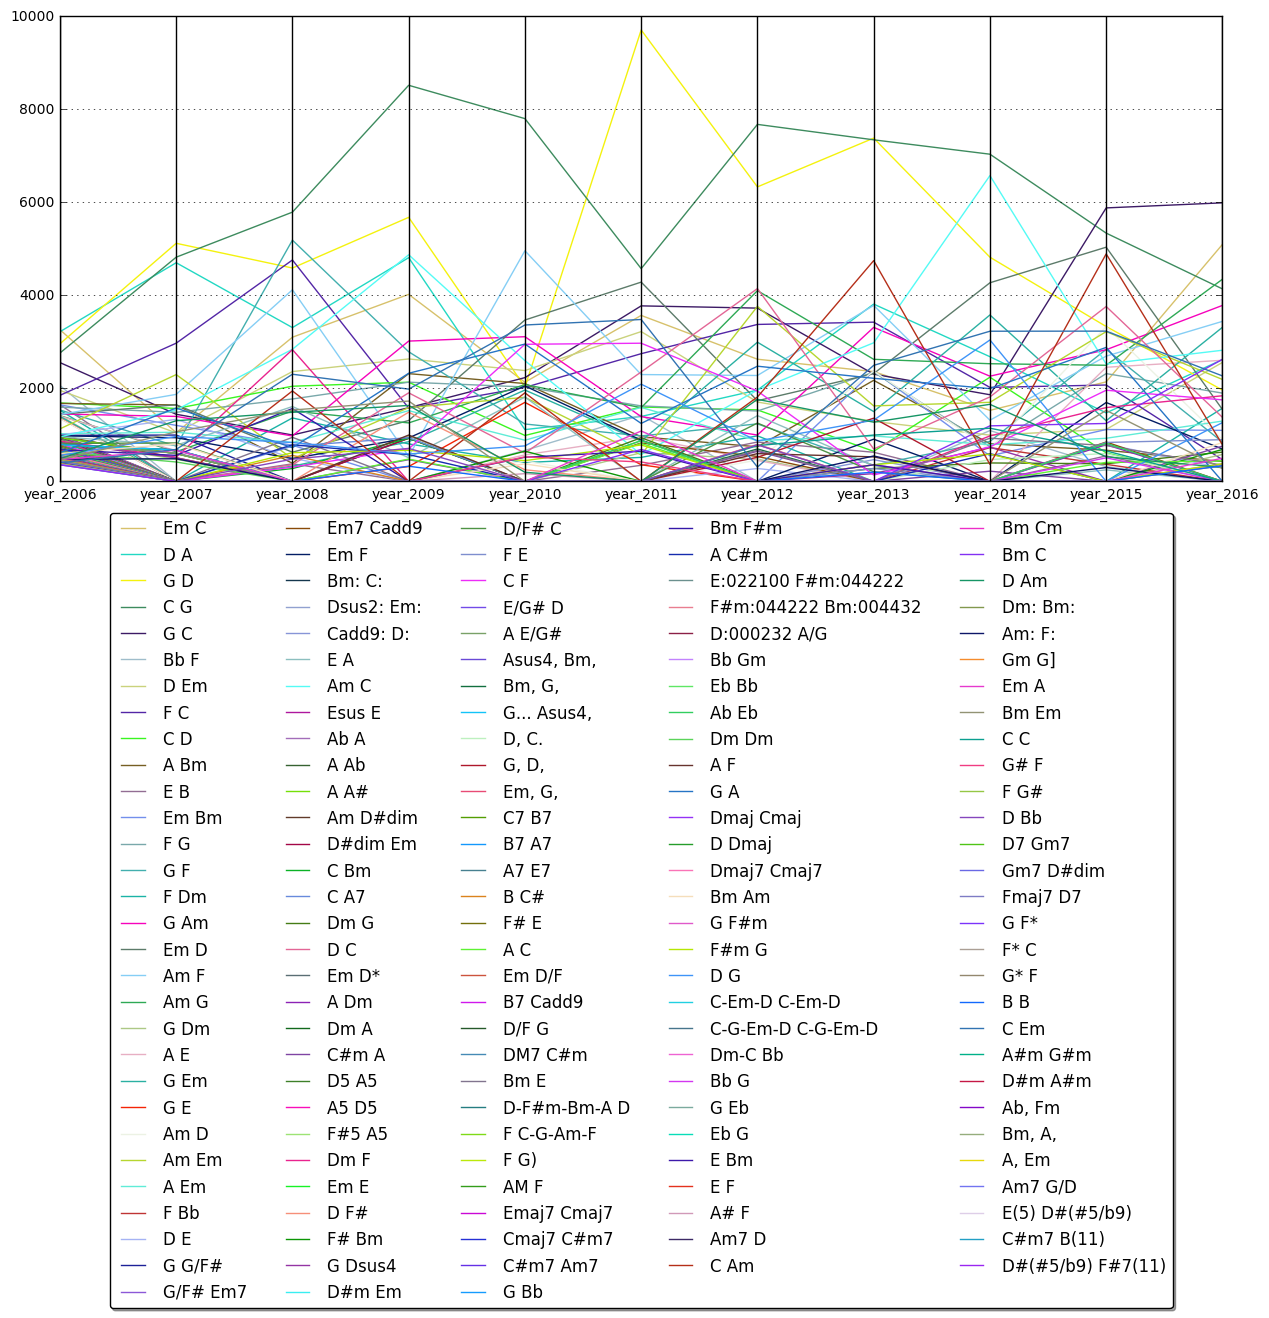

In [41]:
ax = pandas.tools.plotting.parallel_coordinates(final_df, 'chord_pair')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
ax.figure.set_size_inches(15, 6)
plt.show()

In [42]:
%matplotlib inline
final_trans = final_df.transpose()
final_trans = final_trans.drop(final_trans.index[len(final_trans)-1])

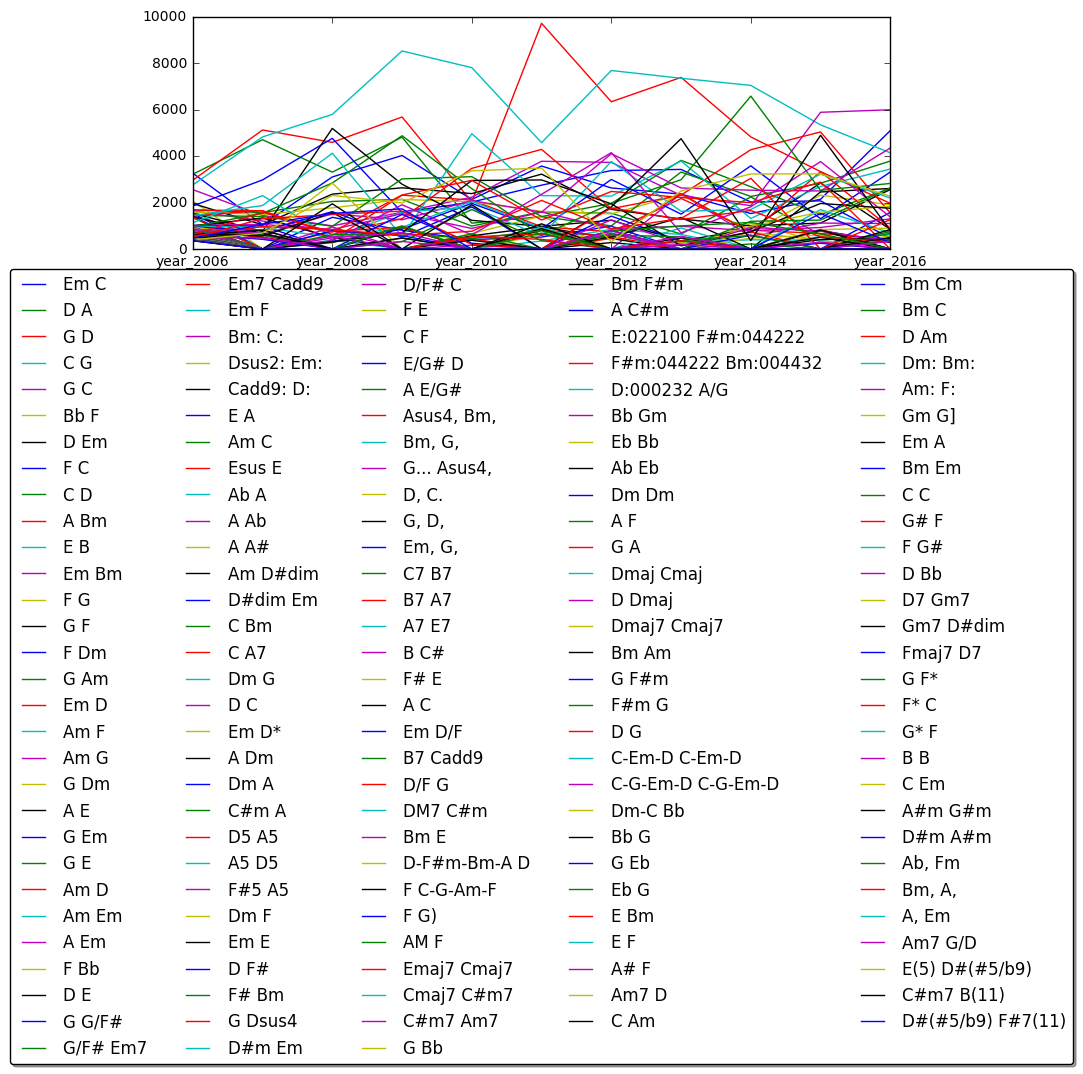

In [43]:
pp = final_trans.plot() # xticks=range(len(final_trans.index))
leg = pp.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
pp.figure.set_size_inches(9, 3)

def pick(event):
    pick.save = event
    text.set_text(str(date_tweet.date.iloc[event.ind[0]]))
ax.figure.canvas.mpl_connect('pick_event', pick)

In [46]:
# final_trans.

,Em C,D A,G D,C G,G C,Bb F,D Em,F C,C D,A Bm,E B,Em Bm,F G,G F,F Dm,G Am,Em D,Am F,Am G,G Dm,A E,G Em,G E,Am D,Am Em,A Em,F Bb,D E,G G/F#,G/F# Em7,Em7 Cadd9,Em F,Bm: C:,Dsus2: Em:,Cadd9: D:,E A,Am C,Esus E,Ab A,A Ab,A A#,Am D#dim,D#dim Em,C Bm,C A7,Dm G,D C,Em D*,A Dm,Dm A,C#m A,D5 A5,A5 D5,F#5 A5,Dm F,Em E,D F#,F# Bm,G Dsus4,D#m Em,D/F# C,F E,C F,E/G# D,A E/G#,"Asus4, Bm,","Bm, G,","G... Asus4,","D, C.","G, D,","Em, G,",C7 B7,B7 A7,A7 E7,B C#,F# E,A C,Em D/F,B7 Cadd9,D/F G,DM7 C#m,Bm E,D-F#m-Bm-A D,F C-G-Am-F,F G),AM F,Emaj7 Cmaj7,Cmaj7 C#m7,C#m7 Am7,G Bb,Bm F#m,A C#m,E:022100 F#m:044222,F#m:044222 Bm:004432,D:000232 A/G,Bb Gm,Eb Bb,Ab Eb,Dm Dm,A F,G A,Dmaj Cmaj,D Dmaj,Dmaj7 Cmaj7,Bm Am,G F#m,F#m G,D G,C-Em-D C-Em-D,C-G-Em-D C-G-Em-D,Dm-C Bb,Bb G,G Eb,Eb G,E Bm,E F,A# F,Am7 D,C Am,Bm Cm,Bm C,D Am,Dm: Bm:,Am: F:,Gm G],Em A,Bm Em,C C,G# F,F G#,D Bb,D7 Gm7,Gm7 D#dim,Fmaj7 D7,G F*,F* C,G* F,B B,C Em,A#m G#m,D#m A#m,"Ab, Fm","Bm, A,","A, Em",Am7 G/D,E(5) D#(#5/b9),C#m7 B(11),D#(#5/b9) F#7(11)
year_2006,3263,3219,2960,2761,2556,2062,1958,1851,1688,1677,1650,1647,1598,1537,1530,1450,1445,1438,1415,1410,1404,1397,1358,1350,1130,1025,1000,998,990,988,987,980,970,968,967,960,958,957,940,938,937,930,928,927,920,917,908,907,898,897,888,880,878,877,867,848,840,838,830,827,817,808,807,800,798,790,788,787,780,778,777,770,768,767,758,757,740,730,728,727,720,718,717,710,708,707,700,698,697,688,680,677,670,668,667,650,648,647,638,618,617,610,608,607,598,568,567,558,550,548,538,537,528,527,520,510,507,500,498,490,488,487,480,478,477,470,468,460,458,457,438,430,428,427,410,408,407,400,397,388,387,380,378,377,368,360,358,357
year_2007,1048,4703,5121,4822,1444,0,1044,2973,1568,1645,0,1205,1486,760,0,1398,1648,1872,638,0,658,0,0,0,2297,1058,0,1335,997,0,508,940,0,0,0,777,1537,0,600,598,597,0,0,0,0,0,0,0,0,0,0,0,0,477,520,0,0,0,507,0,827,0,0,610,608,680,678,677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,560,0,0,0,0,0,0,0,418,0,1578,0,0,0,808,0,0,967,0,0,0,0,0,0,0,0,0,0,0,0,0,1305,0,487,0,670,1065,0,0,0,0,0,0,0,0,0,0,0,688,0,0,0,0,0,0,0,0,0
year_2008,3101,3308,4589,5791,998,0,2362,4762,2047,390,378,778,1773,5189,1365,978,628,4121,1515,0,0,327,0,0,487,838,0,500,0,0,0,490,0,0,0,1610,2842,0,0,0,0,0,0,277,760,0,358,0,0,0,0,0,0,0,2834,0,0,0,0,0,0,0,307,0,0,0,0,0,0,0,0,0,0,0,560,0,0,0,0,0,0,948,0,0,0,0,0,0,0,0,1567,787,0,0,0,0,0,0,0,0,726,0,0,0,0,0,618,837,0,0,0,0,0,0,0,0,0,0,1946,0,0,1486,0,0,0,0,1535,0,0,0,480,0,0,0,0,0,0,0,2305,0,0,0,0,0,0,0,0,0
year_2009,4023,4812,5679,8519,1585,0,2634,1576,2134,2318,0,0,2134,2788,807,3018,1310,538,1258,980,0,854,320,0,1588,1522,0,0,0,0,0,935,0,0,0,510,4874,0,0,0,0,930,928,927,940,0,1905,0,0,0,468,0,0,0,0,0,1488,0,0,0,0,0,700,0,0,0,0,0,0,0,0,0,0,0,0,0,480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,577,0,0,0,0,0,0,0,997,2326,0,0,0,0,0,668,590,0,0,0,0,0,0,0,0,0,0,0,0,0,1634,0,0,0,0,1728,0,0,0,710,0,0,0,0,0,0,327,1985,0,0,0,0,0,0,0,0,0
year_2010,2133,1114,2030,7802,2232,667,2384,2021,988,2105,0,0,2031,1235,407,3112,3471,4961,2083,0,570,1965,1700,438,1808,886,0,0,0,0,0,2053,0,0,0,1814,2597,0,0,0,0,0,0,0,0,0,608,0,0,0,0,0,0,0,0,0,250,650,0,0,0,0,2949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2954,0,0,0,377,0,447,764,0,0,0,0,0,0,520,0,167,0,1905,0,0,197,0,0,0,0,0,0,528,0,0,0,0,0,0,0,0,0,3364,0,0,0,0,0,0,0,0,0
year_2011,3570,1397,9709,4576,3775,1424,3222,2747,1600,960,347,0,1624,978,517,1394,4286,2298,1586,617,954,867,358,0,570,1591,0,0,0,0,827,888,0,0,0,0,580,0,0,0,0,0,0,0,0,940,2354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2972,0,0,0,0,0,0,0,0,0,0,0,0,0,817,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,877,878,0,0,1247,0,0,0,0,0,784,2091,0,0,0,0,0,0,650,0,0,0,0,0,687,0,0,0,0,1084,0,0,418,0,0,0,0,0,0,0,0,0,3482,0,0,0,0,0,0,0,0,0
year_2012,2628,1964,6334,7678,3727,0,1707,3376,1538,744,847,0,1514,1238,980,997,1735,2278,4102,477,450,2994,0,460,3764,877,0,278,0,0,537,0,0,0,0,1415,1964,0,787,0,0,0,0,0,0,0,4147,0,0,0,648,0,0,0,0,0,797,0,0,0,1255,0,1944,0,0,0,698,0,0,520,0,0,0,0,0,0,0,0,0,0,0,670,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59